In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

 # Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

In [159]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [25]:
last_date = session.query(Measurement.prcp,Measurement.date).\
             order_by(Measurement.date.desc()).limit(1).all()       
last_date

[('2017-08-23')]

In [30]:
last_date = session.query(Measurement.date).\
             order_by(Measurement.date.desc()).limit(1).all()       
last_date

[('2017-08-23')]

In [27]:
last_date = dt.date(2017, 8 ,23)

In [29]:
year_ago = last_date - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [43]:
last_12m = session.query(Measurement.date,Measurement.prcp).\
             filter(Measurement.date > year_ago).\
             order_by(Measurement.date).all()       

In [66]:
df = pd.DataFrame(last_12m, columns=['date', 'prcp_scores'])
df = df.set_index("date")
df.head()

,prcp_scores
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [67]:
df = df.dropna(how = 'any')

In [73]:
df = df.reset_index()
df.head()

,date,prcp_scores
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


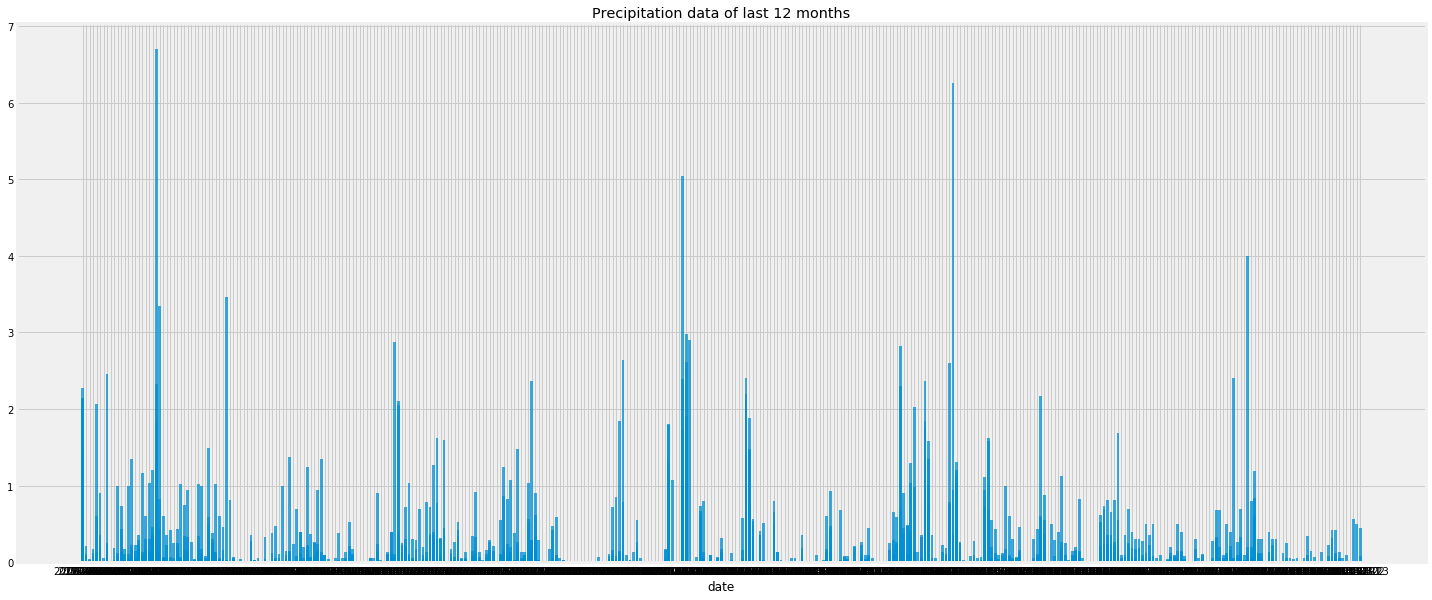

In [154]:
plt.figure(figsize=(20,8))
plt.bar(df['date'].tolist(), df['prcp_scores'],alpha=0.75)
plt.tight_layout()

plt.title("Precipitation data of last 12 months")
plt.xlabel("date")

plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [81]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).\
             group_by(Measurement.station).count()     
station_count

9

In [88]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_rows = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
most_active_id = station_rows[0][0]
most_active_id

'USC00519281'

In [116]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

low = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_id).\
    order_by(Measurement.tobs).limit(1).all()


high = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_id).\
    order_by((Measurement.tobs).desc()).limit(1).all()


ave = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_id).\
    all()

[(low[0][0],high[0][0],ave[0][0])]

[(54.0, 85.0, 71.66378066378067)]

In [127]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_12m = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_id).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.tobs).all()

df_station = pd.DataFrame(station_12m, columns=['temp'])
df_station.head()

,temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


Text(0.5, 0, 'tobs')

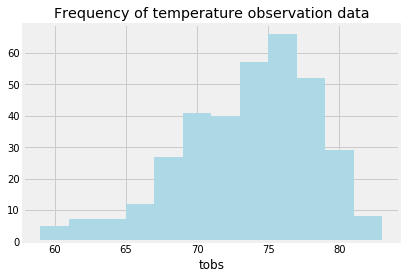

In [156]:
#bins = [55,60,65,70,75,80,85]
plt.hist(df_station["temp"], bins=12, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=1, 
                       log=False, color="lightblue")
plt.title("Frequency of temperature observation data")
plt.xlabel("tobs")


In [157]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [223]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_start = dt.datetime(2015,3,24)
trip_end = dt.datetime(2015,6,7)

start_year_ago = trip_start - dt.timedelta(days=365)
end_year_ago = trip_end - dt.timedelta(days=365)

print(calc_temps(start_year_ago, end_year_ago))

[(63.0, 72.99814814814815, 81.0)]


In [224]:
trip = calc_temps(start_year_ago, end_year_ago)
trip_ave = trip[0][1]
trip_ptp = trip[0][2]-trip[0][0]


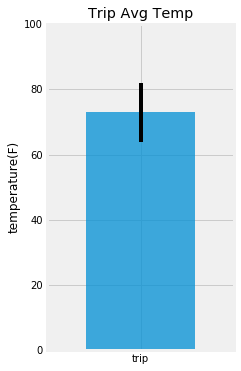

In [225]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(3,6))
plt.bar("trip",trip_ave,alpha=0.75,width = 3.5,yerr =0.5* trip_ptp)

plt.xlim(-3, 3)
plt.ylim(0, 100)

plt.ylabel("temperature(F)")
plt.title("Trip Avg Temp")

plt.show()

In [226]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_prcp = session.query(Measurement.station,func.sum(Measurement.prcp)).\
    group_by(Measurement.station).\
    filter(Measurement.date >= start_year_ago).\
    filter(Measurement.date <= end_year_ago).\
    order_by(func.sum(Measurement.prcp).desc()).all()
trip_prcp


[('USC00516128', 33.28),
 ('USC00519281', 18.44),
 ('USC00513117', 12.309999999999999),
 ('USC00519523', 5.609999999999998),
 ('USC00514830', 3.65),
 ('USC00519397', 3.59),
 ('USC00511918', 3.4200000000000004),
 ('USC00517948', 1.3499999999999999)]

In [227]:
sel = [Measurement.station,func.sum(Measurement.prcp), Station.name, Station.latitude, Station.longitude, Station.elevation]

trip_prcp = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= start_year_ago).\
    filter(Measurement.date <= end_year_ago).\
    order_by(func.sum(Measurement.prcp).desc()).all()

trip_prcp


[('USC00516128',
  33.28,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  18.44,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  12.309999999999999,
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 ('USC00519523',
  5.609999999999998,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  3.65,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 3.59, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00511918',
  3.4200000000000004,
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 ('USC00517948',
  1.3499999999999999,
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9)]

#  Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`